In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the Data Set
data= pd.read_csv("Weather-Data.csv")

In [3]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
data.shape

(8784, 8)

In [6]:
#Statistical Analysis
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [7]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [8]:
#Statistical Analysis
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [9]:
data.Weather.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [10]:
data.Weather.nunique()

50

In [11]:
x = 'Thunderstorms, Moderate Rain Showers,Fog'

In [12]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [13]:
from itertools import chain

In [14]:
def Create_list(x):
    list_of_lists = [w.split() for w in x.split(',')]
    flat_list =list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+FOG'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'Clear'
    elif 'Cloudy' in list1:
        return 'Cloudy'
    else:
        return 'RAIN'

In [15]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [16]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [17]:
data['Std_Weather']= data['Weather'].apply(lambda x : Get_Weather(Create_list(x)))

In [18]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [19]:
data.Std_Weather.value_counts()

Cloudy      3797
Clear       3432
RAIN         603
SNOW         556
FOG          241
RAIN+FOG     129
SNOW+FOG      26
Name: Std_Weather, dtype: int64

In [20]:
cloudy_df = data[data['Std_Weather']=='Cloudy'].sample(600)
cloudy_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
8143,12/5/2012 7:00,5.2,0.4,71,30,25.0,100.74,Mostly Cloudy,Cloudy
3074,5/8/2012 2:00,14.8,5.4,53,4,25.0,100.71,Cloudy,Cloudy
5538,8/18/2012 18:00,20.8,6.9,40,15,48.3,100.80,Mostly Cloudy,Cloudy
3639,5/31/2012 15:00,18.1,5.8,44,19,48.3,100.83,Mostly Cloudy,Cloudy
6879,10/13/2012 15:00,9.4,-2.1,44,19,48.3,102.18,Mostly Cloudy,Cloudy
...,...,...,...,...,...,...,...,...,...
2393,4/9/2012 17:00,8.3,1.0,60,22,24.1,99.24,Cloudy,Cloudy
8201,12/7/2012 17:00,2.8,-3.3,64,11,25.0,101.14,Cloudy,Cloudy
4293,6/27/2012 21:00,19.3,12.7,66,13,25.0,100.19,Mostly Cloudy,Cloudy
1247,2/21/2012 23:00,0.5,-4.4,70,0,25.0,100.20,Cloudy,Cloudy


In [21]:
cloudy_df = data[data['Std_Weather']=='Cloudy']
cloudy_df_sample = cloudy_df.sample(600)
cloudy_df_sample.shape

(600, 9)

In [22]:
Rain_df = data[data['Std_Weather']=='RAIN']
Rain_df_sample = cloudy_df.sample(600)
Rain_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
18,1/1/2012 18:00,3.8,1.0,82,15,12.9,99.74,Rain,RAIN
19,1/1/2012 19:00,3.1,1.3,88,15,12.9,99.68,Rain,RAIN
22,1/1/2012 22:00,4.4,1.9,84,24,19.3,99.32,Rain Showers,RAIN
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers,RAIN
154,1/7/2012 10:00,-5.7,-8.0,84,7,8.0,100.13,Freezing Rain,RAIN
...,...,...,...,...,...,...,...,...,...
8538,12/21/2012 18:00,1.4,0.3,92,46,25.0,97.56,Rain,RAIN
8539,12/21/2012 19:00,2.3,1.1,92,37,11.3,97.52,Rain,RAIN
8540,12/21/2012 20:00,2.4,1.7,95,15,9.7,97.58,Rain,RAIN
8541,12/21/2012 21:00,1.3,0.4,94,22,9.7,97.64,Rain,RAIN


In [23]:
Snow_df = data[data['Std_Weather']=='SNOW']
Snow_df_sample = cloudy_df.sample(600)
Snow_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,SNOW
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers,SNOW
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers,SNOW
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers,SNOW
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers,SNOW
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow,SNOW
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow,SNOW
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,SNOW
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,SNOW


In [24]:
cloudy_df_sample.shape

(600, 9)

In [25]:
Rain_df.shape

(603, 9)

In [26]:
Snow_df.shape

(556, 9)

In [27]:
#Data Visualization

In [28]:
weather_df = pd.concat([cloudy_df_sample,Rain_df,Snow_df], axis=0)
weather_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
324,1/14/2012 12:00,-17.5,-23.8,58,20,48.3,101.16,Mostly Cloudy,Cloudy
730,1/31/2012 10:00,-9.7,-14.2,70,19,19.3,101.54,Cloudy,Cloudy
209,1/9/2012 17:00,-1.4,-5.8,72,15,24.1,100.96,Mostly Cloudy,Cloudy
3077,5/8/2012 5:00,13.7,10.3,80,19,24.1,100.53,Cloudy,Cloudy
2017,3/25/2012 1:00,5.9,-6.2,41,13,25.0,101.03,Cloudy,Cloudy
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow,SNOW
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow,SNOW
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,SNOW
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,SNOW


In [29]:
weather_df.isnull().sum()


Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
Std_Weather         0
dtype: int64

In [30]:
weather_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)

In [31]:
weather_df

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
324,-17.5,-23.8,58,20,48.3,101.16,Cloudy
730,-9.7,-14.2,70,19,19.3,101.54,Cloudy
209,-1.4,-5.8,72,15,24.1,100.96,Cloudy
3077,13.7,10.3,80,19,24.1,100.53,Cloudy
2017,5.9,-6.2,41,13,25.0,101.03,Cloudy
...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,SNOW
8780,0.2,-2.4,83,24,9.7,100.03,SNOW
8781,-0.5,-1.5,93,28,4.8,99.95,SNOW
8782,-0.2,-1.8,89,28,9.7,99.91,SNOW


In [32]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

In [33]:
cols=['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather']

In [34]:
cols = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Std_Weather']

cor_matrix = weather_df[cols].corr()
print(cor_matrix)


                    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.952830  -0.163163        -0.136235   
Dew Point Temp_C  0.952830          1.000000   0.138756        -0.126658   
Rel Hum_%        -0.163163          0.138756   1.000000         0.029477   
Wind Speed_km/h  -0.136235         -0.126658   0.029477         1.000000   
Visibility_km     0.418042          0.234098  -0.626775        -0.127244   
Press_kPa        -0.113721         -0.201479  -0.300994        -0.351381   

                  Visibility_km  Press_kPa  
Temp_C                 0.418042  -0.113721  
Dew Point Temp_C       0.234098  -0.201479  
Rel Hum_%             -0.626775  -0.300994  
Wind Speed_km/h       -0.127244  -0.351381  
Visibility_km          1.000000   0.246672  
Press_kPa              0.246672   1.000000  


C:\Users\kalya\AppData\Local\Temp\ipykernel_27164\4200223637.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = weather_df[cols].corr()


In [35]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [36]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000
mean,5.448493,1.138431,75.495736,17.893121,19.911313,100.610551
std,10.819935,10.314875,14.524541,9.380101,11.370793,0.894901
min,-23.200000,-28.500000,18.000000,0.000000,0.600000,97.520000
25%,-3.700000,-6.900000,66.000000,11.000000,11.300000,100.120000
50%,3.300000,0.000000,79.000000,17.000000,24.100000,100.650000
75%,14.600000,10.000000,86.000000,24.000000,25.000000,101.175000
max,32.200000,24.400000,99.000000,70.000000,48.300000,103.260000


In [37]:
#visualization

In [38]:
cols=['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather']


In [39]:
cor_matrix=weather_df[cols].corr()
cor_matrix

C:\Users\kalya\AppData\Local\Temp\ipykernel_27164\3419096007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix=weather_df[cols].corr()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.952830,-0.163163,-0.136235,0.418042,-0.113721
Dew Point Temp_C,0.952830,1.000000,0.138756,-0.126658,0.234098,-0.201479
Rel Hum_%,-0.163163,0.138756,1.000000,0.029477,-0.626775,-0.300994
Wind Speed_km/h,-0.136235,-0.126658,0.029477,1.000000,-0.127244,-0.351381
Visibility_km,0.418042,0.234098,-0.626775,-0.127244,1.000000,0.246672
Press_kPa,-0.113721,-0.201479,-0.300994,-0.351381,0.246672,1.000000


In [40]:
# Heat Map

<Axes: >

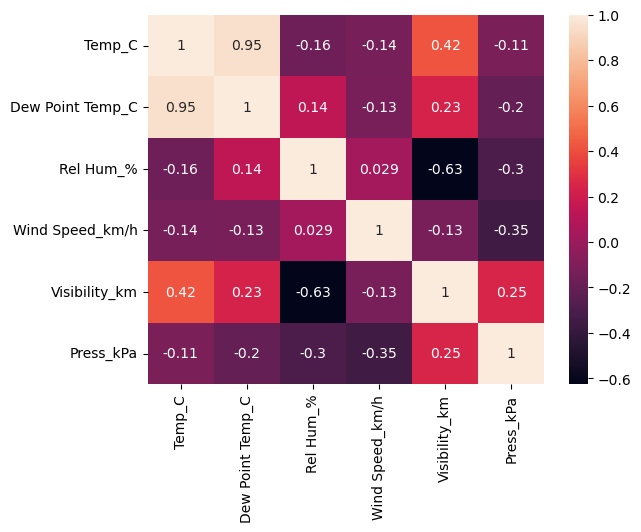

In [41]:
sns.heatmap(cor_matrix,annot=True)

<Axes: ylabel='Frequency'>

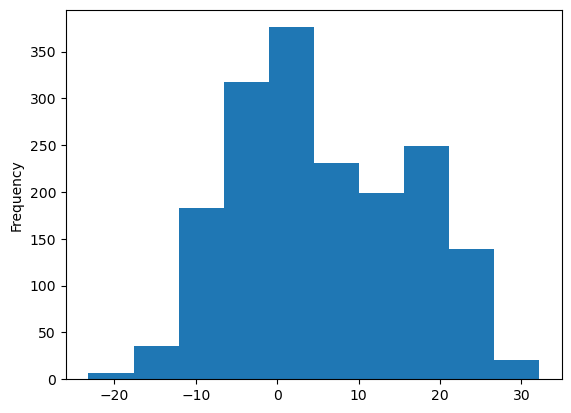

In [43]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

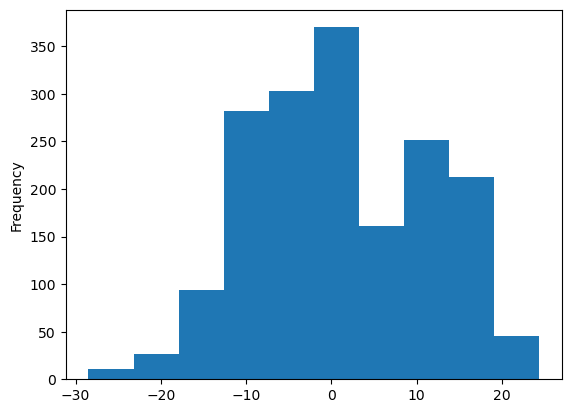

In [44]:
weather_df['Dew Point Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

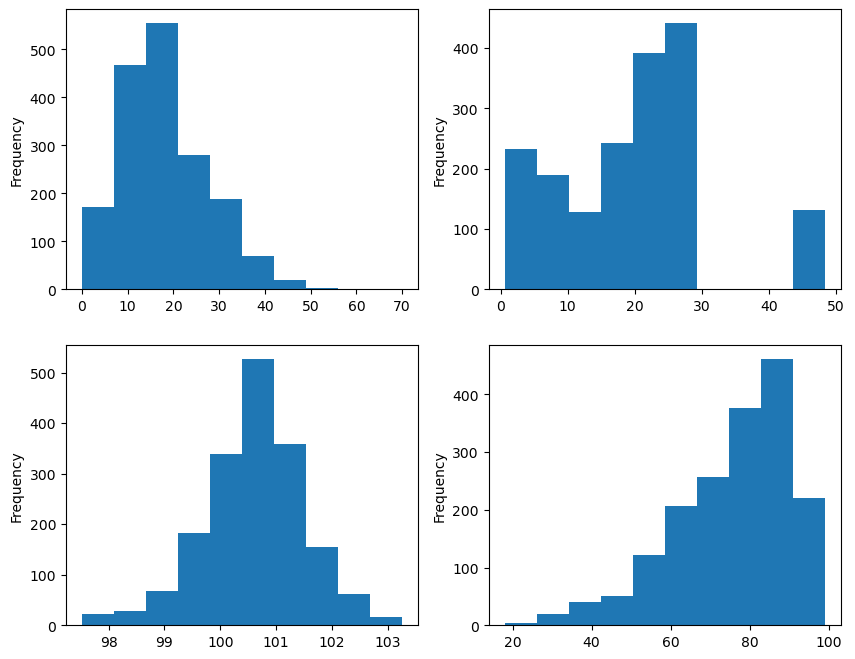

In [52]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
weather_df['Wind Speed_km/h'].plot(kind='hist')

plt.subplot(2,2,2)
weather_df['Visibility_km'].plot(kind='hist')

plt.subplot(2,2,3)
weather_df['Press_kPa'].plot(kind='hist')

plt.subplot(2,2,4)
weather_df[ 'Rel Hum_%'].plot(kind='hist')


In [53]:
#Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le=LabelEncoder()

In [56]:
weather_df['Std_Weather'] = le.fit_transform(weather_df['Std_Weather'])

In [57]:
le.classes_

array(['Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [58]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
324,-17.5,-23.8,58,20,48.3,101.16,0
730,-9.7,-14.2,70,19,19.3,101.54,0
209,-1.4,-5.8,72,15,24.1,100.96,0
3077,13.7,10.3,80,19,24.1,100.53,0
2017,5.9,-6.2,41,13,25.0,101.03,0


In [59]:
X=weather_df.drop(['Std_Weather'],axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
324,-17.5,-23.8,58,20,48.3,101.16
730,-9.7,-14.2,70,19,19.3,101.54
209,-1.4,-5.8,72,15,24.1,100.96
3077,13.7,10.3,80,19,24.1,100.53
2017,5.9,-6.2,41,13,25.0,101.03
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [60]:
# Target Varaible

y =weather_df['Std_Weather']
y

324     0
730     0
209     0
3077    0
2017    0
       ..
8779    2
8780    2
8781    2
8782    2
8783    2
Name: Std_Weather, Length: 1759, dtype: int32

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
std_scaler=StandardScaler()

In [67]:
X_std=std_scaler.fit_transform(X)
X_std

array([[-2.1215487 , -2.4184027 , -1.20490632,  0.22467541,  2.49734212,
         0.61415165],
       [-1.40045213, -1.48744333, -0.37848349,  0.11803643, -0.053777  ,
         1.03890048],
       [-0.63313143, -0.67285388, -0.24074635, -0.30851947,  0.3684772 ,
         0.39059964],
       ...,
       [-0.54992798, -0.25586167,  1.20549361,  1.07778722, -1.32933655,
        -0.73833804],
       [-0.52219349, -0.28495415,  0.93001933,  1.07778722, -0.89828539,
        -0.78304844],
       [-0.50370384, -0.31404663,  0.72341362,  1.29106518, -0.75753399,
        -0.80540364]])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test= train_test_split(X_std,y, test_size=0.2,random_state=42)

In [71]:
x_train.shape, x_test.shape

((1407, 6), (352, 6))

In [72]:
# Model selection

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


scaler = StandardScaler()
X_std = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.328141180027161
